In [2]:
!git clone https://github.com/neuralcomputer/ML_School.git

Cloning into 'ML_School'...
remote: Enumerating objects: 52, done.
remote: Counting objects: 100% (52/52), done.
remote: Compressing objects: 100% (51/51), done.
remote: Total 52 (delta 13), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (52/52), done.


# Тема № 18. Байесовские модели

Вспомним понятие "вероятности". Мы можем думать о вероятности как о средней частоте наступления какого-то события. Если мы подкидываем монетку, то может выпасть или орел или решка, проведем много-много экспериментов и посчитаем количество раз, когда выпал орел. Вероятность выпадения орла посчитаем как отношение числа раз, когда орел выпал к числу экспериментов. И если монетка честная, то эта вероятность составит 0.5. Но при этом орел мог выпадать несколько раз подряд, поэтому такое рассуждение справедливо только при большом числе экспериментов.

Задачи классификации, да и регрессии, тоже можно рассматривать как определение вероятности чего-то. Вероятность того, что класс будет такой-то *при условии* что признаки были такие-то. Такая вероятность называется *условной*. 

Если бы могли для каждого класса посчитать условную вероятность того, что он получится при условии что признаки равны заданным, то можем выбрать такой класс, для которого эта вероятность максимальна.

Но вот проблема, как посчитать такую условную вероятность? Ведь для этого нужно посчитать число примеров, когда класс равнялся заданному при условии что признаки были заданными и поделить это число на число примеров с заданными признаками. Надежды на то, что среди данных будет много примеров с одинаковыми признаками и классами, нет, поэтому посчитать такую вероятность в лоб не получится.

Но не беда, нам на помощь придет специальная теорема, носящая название **Теорема Байеса**. Эта теорема говорит, что условную вероятность события А при условии наступления события В (обозначим как **P(A|B)**) можно посчитать так:

\\( P(A|B)=\frac{P(B|A)*P(A)}{P(B)} \\)

или словами: **"Вероятность события А при условии наступления события В равна вероятности события В при условии наступления события А умноженной на вероятность наступления события А и деленной на вероятность наступления события В"**.

Помогло ли это? Немного, если А это классы, В это признаки, то вместо того, чтобы считать вероятность класса при заданных признаках, мы можем посчитать вероятность признака при заданных классах. 

Но пойдем дальше, предположим, что события независимы, а для одновременного наступления независимых событий вероятности их умножаются. Если у нас несколько признаков B1, B2, B3... и мы считаем, что каждый из признаков независим, то общую вероятность признаков  P(B|A) мы можем посчитать как произведение  \\( P(B|A)=P(B1|A)* P(B2|A)* P(B3|A)*... \\).

Посчитать же эти условные вероятности каждого признака для заданного класса можно, поскольку в данных будет много примеров когда одному признаку соответствует заданный класс. Что же касается величин P(A) - вероятности класса и P(B) - вероятности признака, то последнюю можно вообще не считать, так как она не влияет на выбор класса (не зависит от класса), а первую можно или задать или посчитать из данных.

Ниже в табличке пример признаков погоды и нашего решения (класса) идти ли играть на улицу. В клетках таблицы показано число подходящих примеров.

![img](https://drive.google.com/uc?id=1cVE7q_mRXlWfsBxy_9SL2QF8MzXJPH2D)

Например, условная вероятность того что было прохладно (cool) при условии что мы все-таки пошли играть равна   P(temp. = cool | play = Yes) = 3/9 : было 9 случаев, когда мы пошли играть, в трех из них температура была прохладной. Аналогично можем посчитать вероятности для всех признаков. Вероятность того, что мы вообще пошли играть равняется  P(play  = Yes) = 9/14 : всего 14 примеров, в 9 из них мы пошли играть.

Пусть сегодня солнечно (outlook=sunny), жарко (temperature=hot), нормальная влажность (humidity=normal) и нет ветра (wind=false). Пойдем ли играть?

Посчитайте сами и сравните с результатом:

* P(пойдем играть|сегодня)= 2/9 * 2/9* 6/9 * 6/9 * 9/14 = 0.0141
* P(не пойдем играть|сегодня)= 3/5 * 2/5 * 1/5 * 2/5 * 5/14 = 0.0068

Вероятность идти играть больше чем не идти, значит пойдем.

Предположение, которое мы сделали, о том что признаки неависимы, наивно. Только наивные люди могут предполагать, что наличие солнышка и температура на улице не связаны друг с другом! Поэтому такие классификаторы так и называют *наивный Байесовский классификатор*. Тем не менее для многих случаев он вполне подходит и конечно реализован в библиотеке `sklearn` в модуле `naive_bayes`. Там же реализованы и другие похожие классификаторы, в которых условная вероятность признаков считается по-другому, а не просто как средняя частота, подробности можно посмотреть в [документации](https://scikit-learn.org/stable/modules/naive_bayes.html#gaussian-naive-bayes).

   
[`GaussianNB`](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB) - реализация Гауссовского наивного Байесовского классификатора когда условная вероятность признака xi при заданном классе y определяется по функции Гаусса
\\( P(x_i \mid y) = \frac{1}{\sqrt{2\pi\sigma^2_y}} \exp\left(-\frac{(x_i - \theta_y)^2}{2\sigma^2_y}\right) \\)

Параметры \\( \sigma, \theta \\) являются обучаемыми. Это сильное допущение, но многие переменные имеют такое распределение вероятности, хотя не обязательно так. Поэтому существуют множество подобных методов с разными предположениями о функции распределения условной вероятности признаков.

Можно явно задать вероятности классов в аргументе `priors`.
Имеет атрибуты 
* `class_count_` - число примеров в каждом классе
* `class_prior_` - вероятности классов 
* `classes_` - метки классов 
* `sigma_` - дисперсия признаков по классам 
* `theta_` - среднее признаков по классам
и др.

Методы те же самые как и в других классификаторах этой библиотеки, но есть еще метод `partial_fit()` который позволяет обучать классификатор на части данных, постепенно его улучшая.

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
gnb = GaussianNB() # создаем классификатор
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 75 points : 4


Интересно посмотреть на разделяющую поверхность такого классификатора.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



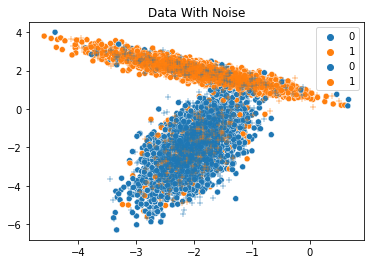

Score= 0.8787878787878788


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



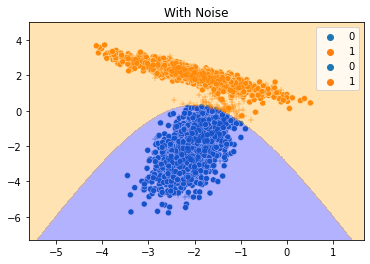

In [3]:
from ML_School.utils import Div_plate
# Div_plate(clf,flip_level) принимает объект-классификатор и уровень шума (ошибок)
# создает двумерные данные, обучает классификатор, рисует разделяющую поверхность 
from sklearn.naive_bayes import GaussianNB
clf=GaussianNB()
flip_level=0.2
Div_plate(clf,flip_level)

Другие варианты наивного байесовского классификатора в которых используются другие варианты расчета условной вероятности признака можно найти в документации:
- [MultinomialNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB)

Здесь условная вероятность признака представляется как \\( P(x_i,y)=\hat{\theta}_{yi} = \frac{ N_{yi} + \alpha}{N_y + \alpha * n} \\)

т.е. как отношение числа примеров с таким признаком для заданного класса к общему числу примеров для заданного класса (как мы и считали ранее) но с некоторой дополнительной константой "альфа" которая используется, чтобы не получалась нулевая вероятность (если примеров нет вообще), поскольку потом вероятности будут умножаться, что с нулем делать бесполезно. 

Поскольку здесь считается число примеров, то такой классификатор может работать только с дискретными признаками, которые можно пересчитать.

Имеет аргументы 
* `alpha` - константа "альфа", по умолчанию 1.0, можно задать и 0.
* `class_prior` - вероятности классов.
* `fit_prior` - говорит, будут ли вероятности классов настраиваться при обучении или нет (по умолчанию - да).

После обучения имеет атрибуты:
* `class_count_` - число примеров каждого класса
* `class_log_prior_` - вероятности классов (логарифмические)
* `intercept_` - то же, что и `class_log_prior_`, нужно чтобы можно было интерпретировать такой классификатор как линейный
* `classes_` - метки классов 
* `feature_log_prob_` - условные вероятности признаков для класов (логарифмические) 
* `coef_` - то же, что и `feature_log_prob_` , нужно чтобы можно было интерпретировать такой классификатор как линейный
* `feature_count_` - число примеров каждого признака для заданного класса 
* `n_features_` - число признаков


In [4]:
import numpy as np
rng = np.random.RandomState(1)
X = rng.randint(5, size=(6, 100))
y = np.array([1, 2, 3, 4, 5, 6])
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X, y)

print(clf.predict(X[2:3]))


[3]


- [BernoulliNB.html](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html)

Поэкспериментируйте с другими Байесовскими классификаторами самостоятельно и посмотрите на результат, синтаксис очень похож.